# Casement Aerordrome Weather 1945 - Present (PDA Project 2019)

## Investigation of the dataset
I will simulate a dataset, sourced from Met Eireann [1]. This dataset will be investigated and then simulated.

In [2]:
# Import pandas and load the dataset
import pandas as pd
df = pd.read_csv('mly3723.csv',skiprows=18) # read in the csv and skip the non-data explanatory rows.

The dataset contains the following variables :

year - year of the measurement

month - month of the measurement

rain - Precipitation Amount (mm)

meant - Mean Air Temperature (C)

maxtp - Maximum Air Temperature (C)

mintp - Minimum Air Temperature (C)

mnmax - Mean Maximum Temperature (C)

mnmin - Mean Minimum Temperature (C)

gmin - Grass Minimum Temperature (C)

wdsp - Mean Wind Speed (knot)

mxgt - Highest Gust (knot)

sun - Sunshine duration (hours)


In [3]:
df.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,sun
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,1991.210526,6.473684,9.466617,18.221203,-0.366165,13.234586,5.701504,61.773835,-3.856842,113.964662
std,16.010658,3.457093,3.915470,4.763040,4.318500,4.452386,3.459947,33.833433,4.528277,52.220373
min,1964.000000,1.000000,-0.500000,5.400000,-15.700000,3.300000,-4.200000,1.700000,-17.100000,22.100000
25%,1977.000000,3.000000,6.100000,13.900000,-3.700000,9.400000,2.800000,37.100000,-7.400000,67.900000
50%,1991.000000,6.000000,8.700000,18.100000,-0.900000,12.800000,5.200000,56.800000,-4.200000,110.900000
75%,2005.000000,9.000000,13.100000,22.400000,3.300000,17.200000,8.800000,79.500000,-0.200000,151.100000
max,2019.000000,12.000000,17.800000,31.000000,9.500000,23.500000,12.900000,206.300000,8.200000,256.500000


In [4]:
# Check for missing data
df.isna().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

In [5]:
# Check for missing data
df.isnull().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

In [6]:
# Adding in day (assuming the first of month), so I can add python datetime
df['day'] = '01' 
df['datetime'] = pd.to_datetime(df[['year','month','day']])
df = df.set_index('datetime')
df['datetime'] = pd.to_datetime(df[['year','month','day']])

### 10 year plots of the original dataset

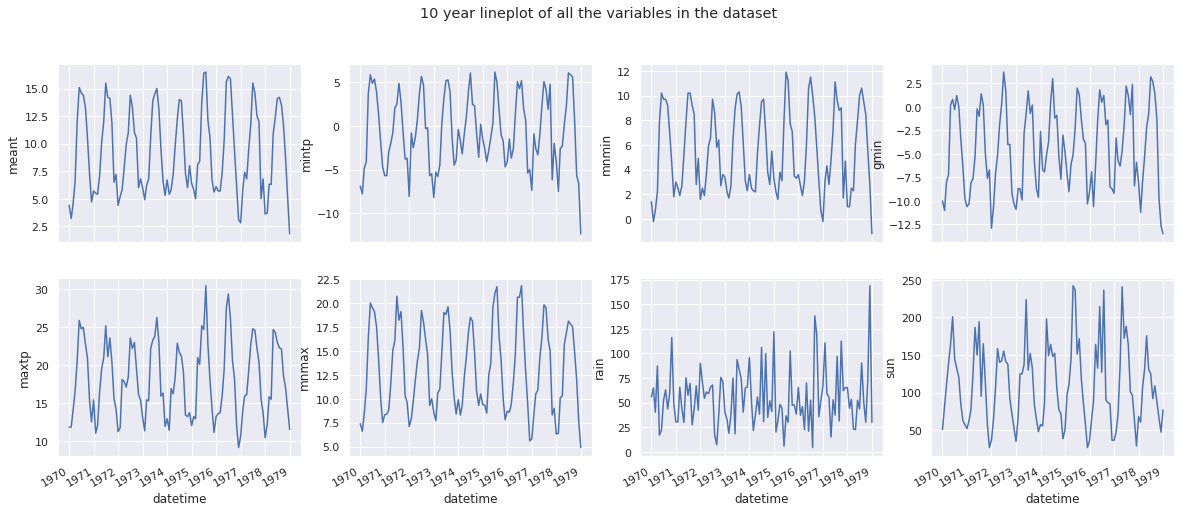

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# The next two lines were suggested by python to get rid of a future warning
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(style="darkgrid")
ts = df['1970-01-01':'1979-01-01'] # 109 months
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(2,4,figsize=(20,8))
sns.lineplot(x='datetime',y="meant",data=ts,ax=axes[0,0])
sns.lineplot(x='datetime',y="maxtp",data=ts,ax=axes[1,0])
sns.lineplot(x='datetime',y="mintp",data=ts,ax=axes[0,1])
sns.lineplot(x='datetime',y="mnmax",data=ts,ax=axes[1,1])
sns.lineplot(x='datetime',y="mnmin",data=ts,ax=axes[0,2])
sns.lineplot(x='datetime',y="rain",data=ts,ax=axes[1,2])
sns.lineplot(x='datetime',y="gmin",data=ts,ax=axes[0,3])
sns.lineplot(x='datetime',y="sun",data=ts,ax=axes[1,3])
axes[0,0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.suptitle('10 year lineplot of all the variables in the dataset')
fig.autofmt_xdate()


***
## Simulating the data

### Variable meant 

#### Finding average values for each month over the entire range of the dataset

In [8]:
# get the mean of the meant variable for each month. This will be used later to calculate a random meant.
jan = df.loc[df.loc[:,'month'] == 1]['meant'].mean()
feb = df.loc[df.loc[:,'month'] == 2]['meant'].mean()
mar = df.loc[df.loc[:,'month'] == 3]['meant'].mean()
apr = df.loc[df.loc[:,'month'] == 4]['meant'].mean()
may = df.loc[df.loc[:,'month'] == 5]['meant'].mean()
jun = df.loc[df.loc[:,'month'] == 6]['meant'].mean()
jul = df.loc[df.loc[:,'month'] == 7]['meant'].mean()
aug = df.loc[df.loc[:,'month'] == 8]['meant'].mean()
sep = df.loc[df.loc[:,'month'] == 9]['meant'].mean()
octo = df.loc[df.loc[:,'month'] == 10]['meant'].mean()
nov = df.loc[df.loc[:,'month'] == 11]['meant'].mean()
dec = df.loc[df.loc[:,'month'] == 12]['meant'].mean()

In [9]:
# As an example, the average meant for the month of June over the entire dataset is 13.403636363636362
df.loc[df.loc[:,'month'] == 6]['meant'].mean()

13.403636363636362

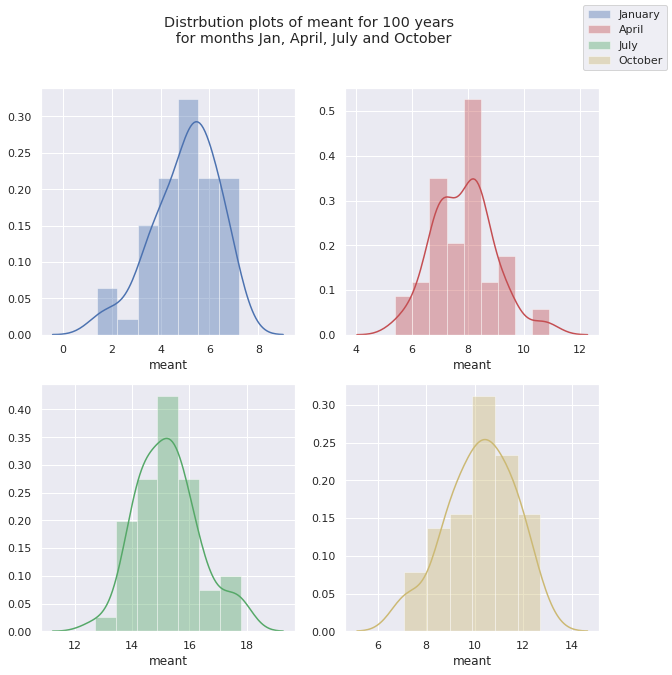

In [10]:
import seaborn as sns
f, axes = plt.subplots(2,2,figsize=(10,10)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
p1 = df.loc[df.loc[:,'month'] == 1]['meant']
p2 = df.loc[df.loc[:,'month'] == 4]['meant']
p3 = df.loc[df.loc[:,'month'] == 7]['meant']
p4 = df.loc[df.loc[:,'month'] == 10]['meant']
sns.distplot(p1,color="b", ax=axes[0,0],label='January')
sns.distplot(p2,color="r", ax=axes[0,1],label='April')
sns.distplot(p3,color="g", ax=axes[1,0],label='July')
sns.distplot(p4,color="y", ax=axes[1,1],label='October')
f.legend()
plt.suptitle('Distrbution plots of meant for 100 years \n for months Jan, April, July and October');

In [11]:
import numpy as np

## Create a 100 year date range with a 1 year frequency starting from January
rng = pd.date_range('1/1/1900', periods=100, freq='12M')
jan_meant_100 = pd.DataFrame(np.random.normal(jan,1,100), index=rng, columns=["meant"]) # Create a DF of 100 samples from normal distribution where standard deviation is 1 and mean is the january meant

## Create a 100 year date range with a 1 year frequency starting from February
rng = pd.date_range('2/1/1900', periods=100, freq='12M')
feb_meant_100 = pd.DataFrame(np.random.normal(feb,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from March
rng = pd.date_range('3/1/1900', periods=100, freq='12M')
mar_meant_100 = pd.DataFrame(np.random.normal(mar,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from April
rng = pd.date_range('4/1/1900', periods=100, freq='12M')
apr_meant_100 = pd.DataFrame(np.random.normal(apr,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from May
rng = pd.date_range('5/1/1900', periods=100, freq='12M')
may_meant_100 = pd.DataFrame(np.random.normal(may,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from June
rng = pd.date_range('6/1/1900', periods=100, freq='12M')
jun_meant_100 = pd.DataFrame(np.random.normal(jun,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from July
rng = pd.date_range('7/1/1900', periods=100, freq='12M')
jul_meant_100 = pd.DataFrame(np.random.normal(jul,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from August
rng = pd.date_range('8/1/1900', periods=100, freq='12M')
aug_meant_100 = pd.DataFrame(np.random.normal(aug,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from September
rng = pd.date_range('9/1/1900', periods=100, freq='12M')
sept_meant_100 = pd.DataFrame(np.random.normal(sep,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from October
rng = pd.date_range('10/1/1900', periods=100, freq='12M')
oct_meant_100 = pd.DataFrame(np.random.normal(octo,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from November
rng = pd.date_range('11/1/1900', periods=100, freq='12M')
nov_meant_100 = pd.DataFrame(np.random.normal(nov,1,100), index=rng, columns=["meant"])

## Create a 100 year date range with a 1 year frequency starting from December
rng = pd.date_range('12/1/1900', periods=100, freq='12M')
dec_meant_100 = pd.DataFrame(np.random.normal(dec,1,100), index=rng, columns=["meant"])

## Merge all the months
result = pd.merge(jan_meant_100,feb_meant_100,how='outer',on='meant',left_index=True, right_index=True) # Adapted from https://stackoverflow.com/a/36293107
result = pd.merge(result,mar_meant_100,how='outer',on='meant',left_index=True, right_index=True)
result = pd.merge(result,apr_meant_100,how='outer',on='meant',left_index=True, right_index=True)
result = pd.merge(result,may_meant_100,how='outer',on='meant',left_index=True, right_index=True)
result = pd.merge(result,jun_meant_100,how='outer',on='meant',left_index=True, right_index=True)
result = pd.merge(result,jul_meant_100,how='outer',on='meant',left_index=True, right_index=True)
result = pd.merge(result,aug_meant_100,how='outer',on='meant',left_index=True, right_index=True)
result = pd.merge(result,sept_meant_100,how='outer',on='meant',left_index=True, right_index=True)
result = pd.merge(result,oct_meant_100,how='outer',on='meant',left_index=True, right_index=True)
result = pd.merge(result,nov_meant_100,how='outer',on='meant',left_index=True, right_index=True)
result = pd.merge(result,dec_meant_100,how='outer',on='meant',left_index=True, right_index=True)

#### Plotting the meant simulated meant data

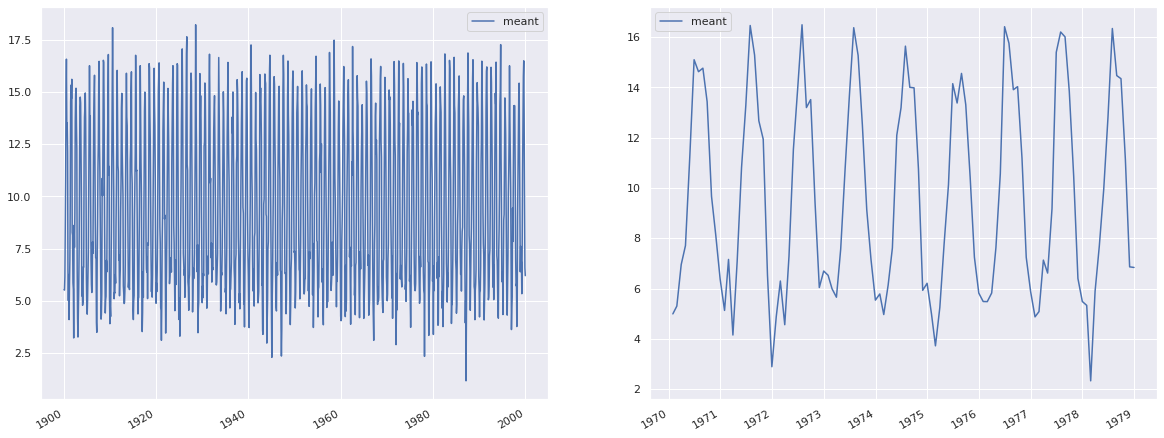

In [12]:
# Plot the results
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=result,ax=axes[0])
sns.lineplot(data=result['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

***
## References
[1] Casement Aerodrome Monthly Data 1944 - Present :  https://cli.fusio.net/cli/climate_data/webdata/mly3723.zip